<a href="https://colab.research.google.com/github/thiagoteles10/preco_de_imoveis-machine-learning-/blob/main/machine_learning(regress%C3%A3o_linear_simples).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv')

## Correlação entre área e preço dos imóveis

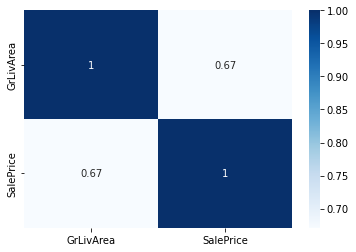

In [3]:
sns.heatmap(df.corr(),cmap='Blues', annot=True);

In [4]:
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


## Renomeando o nome das colunas área e preço

In [5]:
df.rename(columns={'GrLivArea': 'area', 'SalePrice': 'preco'}, inplace = True)

In [6]:
df.head()

,area,preco
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


## Plotando a correlação de área x preço

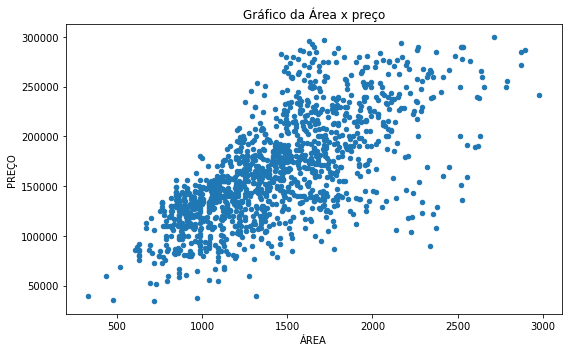

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='area', y='preco', ax=ax)
plt.title('Gráfico da Área x preço')
plt.xlabel('ÁREA')
plt.ylabel('PREÇO')
plt.tight_layout()

## Treinado o modelo de predição

In [8]:
# determinar x e y mas atenção com 1-feature(reshape)
X = df['area'].values.reshape(-1,1)
y = df['preco']

# dividir o dataframe entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# criar e treinar um modelo de regressão linear
rls_model = LinearRegression()
rls_model.fit(X_train, y_train)



LinearRegression()

## Printando o coeficiente e o intercept

In [9]:
print(rls_model.coef_)
print(rls_model.intercept_)

[80.9703805]
48104.391282709184


In [10]:
# previsão em cima do dataset teste
y_pred = rls_model.predict(X_test)

In [ ]:
y_pred

## Plotando reta e dados

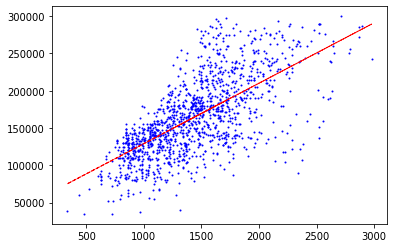

In [12]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X,y, s=1, color='Blue')
ax.plot(X, (rls_model.coef_ * X + rls_model.intercept_),'--r', linewidth=1);

## Regressão linear com distribuições marginais

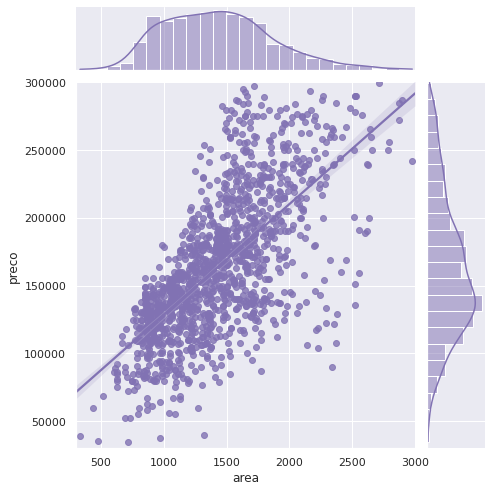

In [13]:

sns.set_theme(style="darkgrid")
sns.jointplot(x="area", y="preco", data=df,
                  kind="reg", truncate=False,
                  xlim=(300, 3000), ylim=(30000, 300000),
                  color="m", height=7);

## Descobrindo o valor do imóvel pela área construída

In [18]:
# descobrindo o valor do imóvel pela área construida.
area = float(input('informe a área construída do imóvel: '))


informe a área construída do imóvel: 500


## Valor previsto do imóvel e conversão para float

In [19]:
x=float(rls_model.predict([[area]]).round(2))

In [20]:
print(f'O valor previsto do imóvel é: R$ {x}')

O valor previsto do imóvel é: R$ 88589.58


In [17]:
# avaliar o desenpenho do modelo

print('R2 score:\t', r2_score(y_test,y_pred))
print('MAE:\t', mean_absolute_error(y_test,y_pred))
print('MSE:\t', mean_squared_error(y_test,y_pred))

R2 score:	 0.49356424318833103
MAE:	 28169.158153503646
MSE:	 1399127500.4423175
